In [81]:
import pandas as pd

In [82]:
fname = 'Table_2_Multi-Omics Driven Metabolic Network Reconstruction and Analysis of Lignocellulosic Carbon Utilization in Rhodosporidium toruloides.XLSX'

In [83]:
from rtoru import model as rt
genes = set(i.id for i in rt.genes)

In [84]:
ge_data = pd.read_excel(fname, sheet_name='RB-TDNA Seq')
ge_data.RTO4_ID = ge_data.RTO4_ID.astype(str)
ge_data['genename'] = 'RT_'+ge_data.RTO4_ID.astype(str)
ge_data[['genename', 'M9_Glucose']]

,genename,M9_Glucose
0,RT_10000,NaN
1,RT_10001,0.470687
2,RT_10002,0.283788
3,RT_10003,-0.030815
4,RT_10004,-0.071440
...,...,...
8339,RT_9995,-0.808815
8340,RT_9996,NaN
8341,RT_9997,0.128856
8342,RT_9998,0.360599


In [85]:
genes_in_data = set(ge_data.genename.values)
genes_in_data

{'RT_11467',
 'RT_9616',
 'RT_16248',
 'RT_8843',
 'RT_12343',
 'RT_9085',
 'RT_14385',
 'RT_16409',
 'RT_8463',
 'RT_14414',
 'RT_11817',
 'RT_11696',
 'RT_10508',
 'RT_9929',
 'RT_11178',
 'RT_11613',
 'RT_11548',
 'RT_10075',
 'RT_10761',
 'RT_15951',
 'RT_13664',
 'RT_9534',
 'RT_12749',
 'RT_16501',
 'RT_10691',
 'RT_12016',
 'RT_14853',
 'RT_11554',
 'RT_11596',
 'RT_9551',
 'RT_9023',
 'RT_9750',
 'RT_13471',
 'RT_16596',
 'RT_9426',
 'RT_15370',
 'RT_9064',
 'RT_13361',
 'RT_10102',
 'RT_10878',
 'RT_15167',
 'RT_14275',
 'RT_10816',
 'RT_11194',
 'RT_14208',
 'RT_14898',
 'RT_15785',
 'RT_16216',
 'RT_12443',
 'RT_9582',
 'RT_9577',
 'RT_9386',
 'RT_12925',
 'RT_15499',
 'RT_11945',
 'RT_10652',
 'RT_13977',
 'RT_12191',
 'RT_15392',
 'RT_16587',
 'RT_9660',
 'RT_13258',
 'RT_9502',
 'RT_14897',
 'RT_12342',
 'RT_9651',
 'RT_8851',
 'RT_15043',
 'RT_10320',
 'RT_13411',
 'RT_14536',
 'RT_11747',
 'RT_14279',
 'RT_16529',
 'RT_12795',
 'RT_8554',
 'RT_16610',
 'RT_12881',
 'RT_

In [86]:
print(f'genes in model {len(genes)}')
print(f'genes in data {len(genes_in_data)}')
print(f'model genes not in data {len(genes.difference(genes_in_data))}')
print(f'data genes not in model {len(genes_in_data.difference(genes))}')

genes in model 1142
genes in data 8344
model genes not in data 31
data genes not in model 7233


In [87]:
ge_in_our_data = ge_data.loc[ge_data.genename.isin(genes)].copy()
ge_in_our_data

,RTO4_ID,M9_Glucose,YNB Glucose,YNB Glucose plus Arginine,YNB Glucose plus Methionine,YNB Glucose plus Dropout Complete,Fitness During Lipid Mobilization,YNB Oleic Acid,YNB Cellobiose,YNB_CSM_KPO4 Glucose,...,YNB_PO4_L-arabitol,YNB_PO4_xylitol,YNB_PO4_D-ribulose,YNB_PO4_D-xylulose,YNB_PO4_CSM_Galactose,YNB_PO4_CSM_Lactate,YNB_PO4_CSM_Valine,YNB_PO4_CSM_Leucine,YNB_PO4_CSM_Phenylalanine,genename
0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT_10000
7,10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT_10007
10,10010,-0.130360,-0.558565,-0.332740,-0.260252,-0.383313,-0.030872,-0.611898,-0.097438,-0.035705,...,-0.732452,-0.836823,-0.490688,-0.534801,-0.035402,-0.427705,-0.143231,-0.240726,-0.376989,RT_10010
12,10012,0.120928,-0.056685,-0.143451,-0.205516,-0.240177,-0.282986,-0.039371,0.021825,-0.185444,...,-0.185901,-0.347117,-0.043478,0.049640,-0.330369,-0.571357,-0.390520,-4.921371,-0.586259,RT_10012
16,10017,-0.117902,0.001326,0.216430,0.169223,-0.072431,0.382748,0.455964,0.161420,0.012681,...,0.073421,0.076093,-0.266397,0.038548,0.024525,0.112220,-0.159979,-0.229817,-0.086100,RT_10017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,9962,-0.102349,0.101140,0.044222,0.206130,0.142080,0.189212,-0.012657,-0.097314,0.004740,...,0.039896,0.240334,0.321752,0.089398,-0.254636,-0.723065,-0.622660,-0.047665,0.811095,RT_9962
8323,9979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT_9979
8325,9981,-0.182969,-1.210120,-1.083946,-0.985173,-0.844407,-0.952909,-0.652234,0.200798,0.016013,...,-0.450650,-0.102575,-0.311876,-0.298921,-0.471137,-0.915556,-0.221405,-0.589374,-0.123179,RT_9981
8334,9990,-0.272603,-0.184758,0.337242,0.525320,-0.020653,0.544806,-0.110552,-0.359997,0.187456,...,-4.105096,-4.463727,-0.667114,-4.072184,-0.077310,0.459774,0.053585,0.211604,-0.229242,RT_9990


In [88]:
ge_in_our_data.dropna(subset=['M9_Glucose'], inplace=True)
ge_in_our_data

,RTO4_ID,M9_Glucose,YNB Glucose,YNB Glucose plus Arginine,YNB Glucose plus Methionine,YNB Glucose plus Dropout Complete,Fitness During Lipid Mobilization,YNB Oleic Acid,YNB Cellobiose,YNB_CSM_KPO4 Glucose,...,YNB_PO4_L-arabitol,YNB_PO4_xylitol,YNB_PO4_D-ribulose,YNB_PO4_D-xylulose,YNB_PO4_CSM_Galactose,YNB_PO4_CSM_Lactate,YNB_PO4_CSM_Valine,YNB_PO4_CSM_Leucine,YNB_PO4_CSM_Phenylalanine,genename
10,10010,-0.130360,-0.558565,-0.332740,-0.260252,-0.383313,-0.030872,-0.611898,-0.097438,-0.035705,...,-0.732452,-0.836823,-0.490688,-0.534801,-0.035402,-0.427705,-0.143231,-0.240726,-0.376989,RT_10010
12,10012,0.120928,-0.056685,-0.143451,-0.205516,-0.240177,-0.282986,-0.039371,0.021825,-0.185444,...,-0.185901,-0.347117,-0.043478,0.049640,-0.330369,-0.571357,-0.390520,-4.921371,-0.586259,RT_10012
16,10017,-0.117902,0.001326,0.216430,0.169223,-0.072431,0.382748,0.455964,0.161420,0.012681,...,0.073421,0.076093,-0.266397,0.038548,0.024525,0.112220,-0.159979,-0.229817,-0.086100,RT_10017
28,10029,-0.020871,0.052095,0.224890,0.241546,-0.067308,0.622053,-0.412340,0.096512,-0.167850,...,-0.759319,-0.288770,-0.648312,0.551737,-0.069712,-0.414340,0.039014,-0.424238,-1.523899,RT_10029
37,10038,-0.365987,-0.198609,-0.156681,0.504791,-0.298004,-0.330527,-0.754754,-0.425817,-0.064758,...,0.157148,0.081089,-0.082244,-0.037806,-0.397060,-0.226573,-0.212943,-0.605702,-0.036510,RT_10038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,9959,-0.496589,-0.049252,-0.280461,-0.192801,-0.186293,0.094831,0.158215,-0.052001,-0.190215,...,-0.449143,-0.391230,-0.526536,-0.692617,-0.658693,-0.382288,-0.727372,-0.582871,0.019887,RT_9959
8306,9962,-0.102349,0.101140,0.044222,0.206130,0.142080,0.189212,-0.012657,-0.097314,0.004740,...,0.039896,0.240334,0.321752,0.089398,-0.254636,-0.723065,-0.622660,-0.047665,0.811095,RT_9962
8325,9981,-0.182969,-1.210120,-1.083946,-0.985173,-0.844407,-0.952909,-0.652234,0.200798,0.016013,...,-0.450650,-0.102575,-0.311876,-0.298921,-0.471137,-0.915556,-0.221405,-0.589374,-0.123179,RT_9981
8334,9990,-0.272603,-0.184758,0.337242,0.525320,-0.020653,0.544806,-0.110552,-0.359997,0.187456,...,-4.105096,-4.463727,-0.667114,-4.072184,-0.077310,0.459774,0.053585,0.211604,-0.229242,RT_9990


In [89]:
ge_in_our_data.loc[ge_in_our_data.M9_Glucose<0, 'essential'] = True
ge_in_our_data.loc[ge_in_our_data.M9_Glucose>0, 'essential'] = False
ge_in_our_data['comment'] = ''
ge_in_our_data['gene'] = ge_in_our_data['genename']

In [90]:
ge_for_export = ge_in_our_data[['gene', 'essential','comment']].copy()
ge_for_export

,gene,essential,comment
10,RT_10010,True,
12,RT_10012,False,
16,RT_10017,True,
28,RT_10029,True,
37,RT_10038,True,
...,...,...,...
8303,RT_9959,True,
8306,RT_9962,True,
8325,RT_9981,True,
8334,RT_9990,True,


<AxesSubplot: >

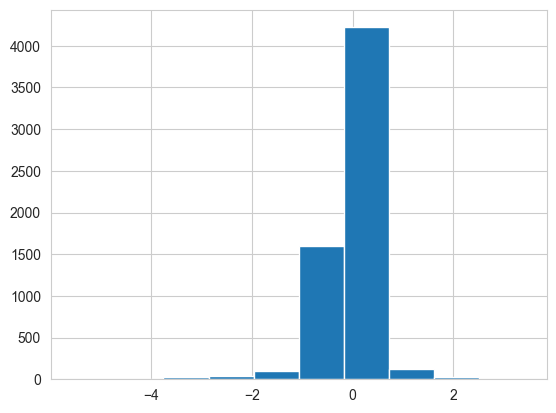

In [91]:
ge_data.M9_Glucose.hist()

In [92]:
ge_for_export

,gene,essential,comment
10,RT_10010,True,
12,RT_10012,False,
16,RT_10017,True,
28,RT_10029,True,
37,RT_10038,True,
...,...,...,...
8303,RT_9959,True,
8306,RT_9962,True,
8325,RT_9981,True,
8334,RT_9990,True,


In [93]:
ge = pd.read_csv('eLife_essential_genes.txt', delimiter='\t')
ge['gene'] = 'RT_'+ ge['Protein ID'].astype(str)
del ge['Protein ID']
ge = ge[['gene', 'Essential']]
ge.loc[ge.Essential=='No', 'Ess'] = False
ge.loc[ge.Essential=='Yes', 'Ess'] = True
ge.dropna(subset='Ess', inplace=True)
ge

,gene,Essential,Ess
0,RT_15174,Yes,True
1,RT_15278,Yes,True
2,RT_16786,Yes,True
3,RT_14470,Yes,True
4,RT_16628,Yes,True
...,...,...,...
8485,RT_16817,No,False
8486,RT_14437,No,False
8487,RT_15584,No,False
8488,RT_10519,No,False


In [94]:
ge[ge.Ess].shape

(1337, 3)

In [ ]:
essential = set(ge[ge.Ess].gene)
sorted(essential)

In [ ]:
new_ge = pd.DataFrame(index=list(essential.intersection(genes)))
new_ge['essential'] = True
new_ge

In [ ]:
new_non_ge = pd.DataFrame(index=list(genes.difference(essential)))
new_non_ge['essential'] = False
new_non_ge

In [ ]:
new_ge_all = pd.concat([new_non_ge, new_ge])
new_ge_all

In [ ]:
ge_for_export = new_ge_all.reset_index()

In [120]:
ge_for_export['gene'] = ge_for_export['index']
del ge_for_export['index']

In [121]:
ge_for_export.to_csv('../ge_m9_glucose.csv', index=False)

In [104]:
sorted(set(ge_for_export.gene))

['RT_10010',
 'RT_10012',
 'RT_10017',
 'RT_10029',
 'RT_10038',
 'RT_10043',
 'RT_10069',
 'RT_10104',
 'RT_10136',
 'RT_10140',
 'RT_10149',
 'RT_10156',
 'RT_10170',
 'RT_10182',
 'RT_10184',
 'RT_10200',
 'RT_10205',
 'RT_10210',
 'RT_10212',
 'RT_10218',
 'RT_10226',
 'RT_10251',
 'RT_10264',
 'RT_10276',
 'RT_10277',
 'RT_10292',
 'RT_10293',
 'RT_10304',
 'RT_10308',
 'RT_10316',
 'RT_10317',
 'RT_10331',
 'RT_10374',
 'RT_10379',
 'RT_10380',
 'RT_10391',
 'RT_10393',
 'RT_10408',
 'RT_10428',
 'RT_10452',
 'RT_10455',
 'RT_10456',
 'RT_10461',
 'RT_10469',
 'RT_10475',
 'RT_10484',
 'RT_10490',
 'RT_10497',
 'RT_10504',
 'RT_10514',
 'RT_10529',
 'RT_10541',
 'RT_10551',
 'RT_10558',
 'RT_10570',
 'RT_10572',
 'RT_10576',
 'RT_10577',
 'RT_10583',
 'RT_10592',
 'RT_10607',
 'RT_10614',
 'RT_10635',
 'RT_10647',
 'RT_10658',
 'RT_10704',
 'RT_10705',
 'RT_10722',
 'RT_10811',
 'RT_10812',
 'RT_10841',
 'RT_10869',
 'RT_10885',
 'RT_10921',
 'RT_10937',
 'RT_10941',
 'RT_10946',

In [102]:
set(ge_for_export.gene).intersection(essential)

set()

In [96]:
ge_for_export[ge_for_export.gene.isin(essential)]

,gene,essential,comment


In [97]:
# ge_for_export['Ess'] = False
ge_for_export.loc[ge_for_export.gene.isin(essential), 'Ess'] = True
ge_for_export

,gene,essential,comment,Ess
10,RT_10010,True,,NaN
12,RT_10012,False,,NaN
16,RT_10017,True,,NaN
28,RT_10029,True,,NaN
37,RT_10038,True,,NaN
...,...,...,...,...
8303,RT_9959,True,,NaN
8306,RT_9962,True,,NaN
8325,RT_9981,True,,NaN
8334,RT_9990,True,,NaN


In [98]:
ge_for_export.to_csv('../ge_m9_glucose.csv', index=False)

In [99]:
ge_for_export.set_index('gene').join(ge.set_index('gene'))

ValueError: columns overlap but no suffix specified: Index(['Ess'], dtype='object')